In [138]:
#Loading the data
import os 
import csv

lines=[]
data_folder = 'C:\data\\'
file = '\driving_log.csv'
for child in os.listdir(data_folder):
    data_subfolder = os.path.join(data_folder, child)
    sub_file = data_subfolder + file
    with open(sub_file) as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            lines.append(line)
    print ("file: ", sub_file, ", data samples: ", len(lines))
            
print("total data samples: ", len(lines))


file:  C:\data\1\driving_log.csv , data samples:  8036
total data samples:  8036


In [97]:
#Example of how the csv file holds the data
import pandas as pn
%matplotlib inline

column_names = ['center', 'left', 'right', 'steering', 'throttle', 'brake', 'speed']
data_sample = pn.read_csv(data_folder + os.listdir(data_folder)[1] + file ,names=column_names)
data_sample.iloc[:10]

,center,left,right,steering,throttle,brake,speed
0,C:\data\2\IMG\center_2017_08_14_09_31_18_129.jpg,C:\data\2\IMG\left_2017_08_14_09_31_18_129.jpg,C:\data\2\IMG\right_2017_08_14_09_31_18_129.jpg,0.0,0.000000,0,1.682009
1,C:\data\2\IMG\center_2017_08_14_09_31_18_205.jpg,C:\data\2\IMG\left_2017_08_14_09_31_18_205.jpg,C:\data\2\IMG\right_2017_08_14_09_31_18_205.jpg,0.0,0.000000,0,1.668493
2,C:\data\2\IMG\center_2017_08_14_09_31_18_272.jpg,C:\data\2\IMG\left_2017_08_14_09_31_18_272.jpg,C:\data\2\IMG\right_2017_08_14_09_31_18_272.jpg,0.0,0.000000,0,1.658427
3,C:\data\2\IMG\center_2017_08_14_09_31_18_341.jpg,C:\data\2\IMG\left_2017_08_14_09_31_18_341.jpg,C:\data\2\IMG\right_2017_08_14_09_31_18_341.jpg,0.0,0.000000,0,1.645101
4,C:\data\2\IMG\center_2017_08_14_09_31_18_408.jpg,C:\data\2\IMG\left_2017_08_14_09_31_18_408.jpg,C:\data\2\IMG\right_2017_08_14_09_31_18_408.jpg,0.0,0.000000,0,1.635177
5,C:\data\2\IMG\center_2017_08_14_09_31_18_484.jpg,C:\data\2\IMG\left_2017_08_14_09_31_18_484.jpg,C:\data\2\IMG\right_2017_08_14_09_31_18_484.jpg,0.0,0.000000,0,1.622037
6,C:\data\2\IMG\center_2017_08_14_09_31_18_557.jpg,C:\data\2\IMG\left_2017_08_14_09_31_18_557.jpg,C:\data\2\IMG\right_2017_08_14_09_31_18_557.jpg,0.0,0.000000,0,1.609004
7,C:\data\2\IMG\center_2017_08_14_09_31_18_630.jpg,C:\data\2\IMG\left_2017_08_14_09_31_18_630.jpg,C:\data\2\IMG\right_2017_08_14_09_31_18_630.jpg,0.0,0.000000,0,1.599297
8,C:\data\2\IMG\center_2017_08_14_09_31_18_697.jpg,C:\data\2\IMG\left_2017_08_14_09_31_18_697.jpg,C:\data\2\IMG\right_2017_08_14_09_31_18_697.jpg,0.0,0.145292,0,1.661237
9,C:\data\2\IMG\center_2017_08_14_09_31_18_764.jpg,C:\data\2\IMG\left_2017_08_14_09_31_18_764.jpg,C:\data\2\IMG\right_2017_08_14_09_31_18_764.jpg,0.0,0.317140,0,1.792232


In [139]:
lines = lines[1:6]
#print(lines_new)

In [117]:
#Augmentation

def flip_images(images, measurements):
    flipped_images, flipped_measurements = [], []
    for img, measurements in zip(images, measurements):
        flipped_images.append(cv2.flip(img, 1))
        flipped_measurements.append(measurements * -1.0)
    return flipped_images, flipped_measurements
        
       
def brightness_randomization(images):
    brightness_images= []
    for img in images:
        hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        hsv[::2] = hsv[::2] * (.5 + np.random.random())
        brightness_images.append(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB))
    return brightness_images


def crop_images(images):
    cropped_images= []
    for img in images:
        cropped_images.append(img[60:140, 0:320])
    return cropped_images


In [11]:
# Looping the csv lines and uploading all the images as the dataset 
import cv2
import numpy as np

angle_deviation=0.1

images = []
measurments = []
for line in lines_new:
    #Loading the original images from the car 3 cameras and crop them
    image_center = cv2.imread(line[0])
    image_left = cv2.imread(line[1])
    image_right = cv2.imread(line[2])
    cropped_images = crop_images([image_center, image_left, image_right])
    
    # add images and angles to data set
    images.extend(cropped_images)
    steering = float(line[3])
    measurments.extend([steering, steering+angle_deviation, steering-angle_deviation])
    
    #Adding flipped images
#    flipped_images, flipped_measurments = flip_images(cropped_images, measurments[-3:])
#    images.extend(flipped_images)
#    measurments.extend(flipped_measurments)
    
#Converting to array since this is the format Keras require
X_train = np.array(images)
y_train = np.array(measurments)

print("features Shape: ", X_train.shape)
print("lables Shape: ", len(y_train))

features Shape:  (24108, 80, 320, 3)
lables Shape:  24108


In [12]:
X_train = np.array(images[1:3000])
y_train = np.array(measurments[1:3000])

In [13]:
#Image processing visualization
import matplotlib.pyplot as plt
import cv2

sample_images=[]
sample_images_title=[]
#original_img = images[0]  #left_2016_12_01_13_34_24_656.jpg

  
#original image
file = 'C:\\data\\1\\IMG\\left_2016_12_01_13_34_24_656.jpg'
original_img = cv2.imread(file)
sample_images.append(original_img)
sample_images_title.append('original image')
print("original image shape: ", original_img.shape)

#flipping the image
flip_image = cv2.flip(original_img,1)
sample_images.append(flip_image)
sample_images_title.append('flipped image')
print("flipped image shape: ", flip_image.shape)

#brightness randomization
#image_hsv = brightness_randomization(original_img)
#sample_images.append(image_hsv)
#sample_images_title.append('brightness randomization')
#print("brightness image shape: ", image_hsv.shape)

#reduced bandwidth 
yuv_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2YUV)
sample_images.append(yuv_img)
sample_images_title.append('reduced bandwidth')
print("yuv image shape: ", yuv_img.shape)

#cropping the image
crop_img = original_img[60:140, 0:320]
sample_images.append(crop_img)
sample_images_title.append('cropped image')
print("cropped image shape: ", crop_img.shape)

original image shape:  (160, 320, 3)
flipped image shape:  (160, 320, 3)
yuv image shape:  (160, 320, 3)
cropped image shape:  (80, 320, 3)


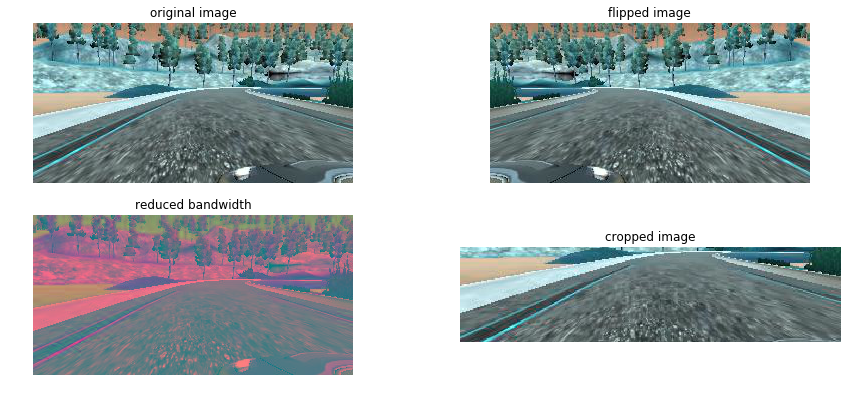

In [14]:

plt.figure(figsize=(15, 10))
for i in range(len(sample_images)):
   # Displaying the images 
    plt.subplot(3, 2, i+1)
    plt.imshow(sample_images[i]) 
    plt.title(sample_images_title[i])
    plt.axis('off')

In [5]:
#The distribution of the steering angle for the dataset
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab as pl

plt.hist(y_train)
plt.title("Distribution of the Steering lables")
plt.ylabel("Number of samples")
plt.xlabel("steering angle")
plt.show()

fit = stats.norm.pdf(y_train, np.mean(y_train), np.std(y_train))  #this is a fitting indeed
plt.plot(y_train,fit,'-o', color='g')
plt.hist(y_train,normed=True,color='dodgerblue')      #use this to draw histogram of your data
plt.title("Distribution of the Steering lables")
plt.ylabel("Number of samples")
plt.xlabel("steering angle")
plt.show()  

NameError: name 'y_train' is not defined

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from time import time
start_time = time()

dropout = 0.5

model = Sequential()
#normalization and mean zero - centered around zero with small standard deviation 
model.add(Lambda(lambda x: x/255.0 -0.5, input_shape=(80,320,3))) 
#cropping2D layer
#model.add(Cropping2D(cropping=((70,25), (0,0)), input_shape=(160,320,3)))
#model.add(Flatten())
model.add(Dense(1))
model.add(Conv2D(24, kernel_size=(5, 5), padding='valid', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(dropout))
model.add(Conv2D(36, kernel_size=(5, 5), padding='valid', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(dropout))
model.add(Conv2D(48, kernel_size=(5, 5), padding='valid', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, validation_split=0.2, shuffle=True, epochs=2, verbose = 1)
model.save('model.h5') # To later use it to drive in the simulator

total_time = time() - start_time
minutes, seconds = divmod(total_time, 60)
print ("Total time for training: ", minutes, "min, {:.0f}".format(seconds),  "s ")

#streering_prediction = model.predict(X_train)
#print(streering_prediction)

In [150]:
print(y_train)

2999


In [147]:

streering_prediction = model.predict(X_train)
print(streering_prediction)

[[ 0.00487568]
 [ 0.00487568]
 [ 0.00487568]
 ..., 
 [ 0.00487568]
 [ 0.00487568]
 [ 0.00487568]]


In [140]:
import cv2
import numpy as np
import random
from sklearn.utils import shuffle

angle_deviation=0.1
    
# Spliting the dataset to Train and Validation
from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(lines, test_size=0.2)

def load_images(line):
    images = []
    measurements = []
    # Load the center image and steering
    steering = float(line[3])
    images.append(cv2.imread(line[0]))
    measurements.append(steering)

    # For 25% of the cases - load also the right and left images
    if (random.randint(1, 4) == 4):
        images.append(cv2.imread(line[1]))
        measurements.append(steering + angle_deviation)
        images.append(cv2.imread(line[2]))
        measurements.append(steering - angle_deviation)

    # Adding flipped images for 30% of the cases
    if (random.randint(1, 3) == 3):
        flipped_images, flipped_measurements = flip_images(images, measurements)
        images.extend(flipped_images)
        measurements.extend(flipped_measurements)
    return images, measurements

def generator(samples, batch_size=32):
    while 1: # Loop forever so the generator never terminates
        shuffle(samples)
        for offset in range(0, len(samples), batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images, measurements = [], []
            for batch_sample in batch_samples:
                loaded_images, loaded_imeasurements = [],[]
                #Loading the original images from the 3 cameras, cropping, flipping and append to the dataset
                loaded_images, loaded_imeasurements = load_images(line)
                cropped_images = crop_images(loaded_images)
                images.extend(cropped_images)
                measurements.extend(loaded_imeasurements)              
                  
            X_train = np.array(images)
            y_train = np.array(measurements)
            yield shuffle(X_train, y_train)

# compile and train the model using the generator function
train_generator = generator(train_samples, batch_size=32)
validation_generator = generator(validation_samples, batch_size=32)

print("features Shape: ", train_generator)
print("lables Shape: ", validation_generator)

features Shape:  <generator object generator at 0x00000000FEAAAA98>
lables Shape:  <generator object generator at 0x00000000FEAAA888>


In [153]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Cropping2D, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D

dropout = 0.5

model = Sequential()
#normalization and mean zero - centered around zero with small standard deviation 
model.add(Lambda(lambda x: x/255.0 -0.5, input_shape=(80,320,3))) 
#cropping2D layer
#model.add(Cropping2D(cropping=((70,25), (0,0)), input_shape=(160,320,3)))
#model.add(Flatten())
#model.add(Dense(1))
model.add(Conv2D(24, kernel_size=(5, 5), padding='valid', activation='relu'))
#model.add(MaxPooling2D())
#model.add(Dropout(dropout))
model.add(Conv2D(36, kernel_size=(5, 5), padding='valid', activation='relu'))
#model.add(MaxPooling2D())
model.add(Dropout(dropout))
model.add(Conv2D(48, kernel_size=(5, 5), padding='valid', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(dropout))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

In [154]:
from time import time
start_time = time()

model.compile(loss='mse', optimizer='adam')
history_object = model.fit_generator(train_generator, steps_per_epoch= len(train_samples), validation_data=validation_generator, 
    validation_steps=len(validation_samples), epochs=5, verbose = 1)
#validation_data=validation_generator, validation_steps=len(validation_samples),

total_time = time() - start_time
minutes, seconds = divmod(total_time, 60)
print ("Total time for training: ", minutes, "min, {:.0f}".format(seconds),  "s ")

Epoch 1/5
4/4 [==============================] - 14s - loss: 784.2216 - val_loss: 7.8837
Epoch 2/5
4/4 [==============================] - 14s - loss: 42.1006 - val_loss: 0.0097
Epoch 3/5
4/4 [==============================] - 20s - loss: 0.2148 - val_loss: 4.6207e-04
Epoch 4/5
4/4 [==============================] - 15s - loss: 0.0063 - val_loss: 0.0088
Epoch 5/5
4/4 [==============================] - 13s - loss: 0.0021 - val_loss: 0.0028
Total time for training:  1.0 min, 19 s 


dict_keys(['val_loss', 'loss'])


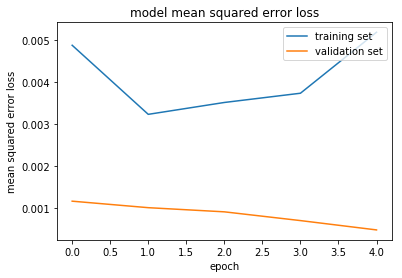

In [151]:
from keras.models import Model
import matplotlib.pyplot as plt

### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()